# Librerias

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import Algoritmosnumericos as Alg
plt.style.use('dark_background')
%matplotlib widget


# Análisis cuantitativo

## Ley de Ohm para diferentes resistores

KeyError: 'I(mA)'

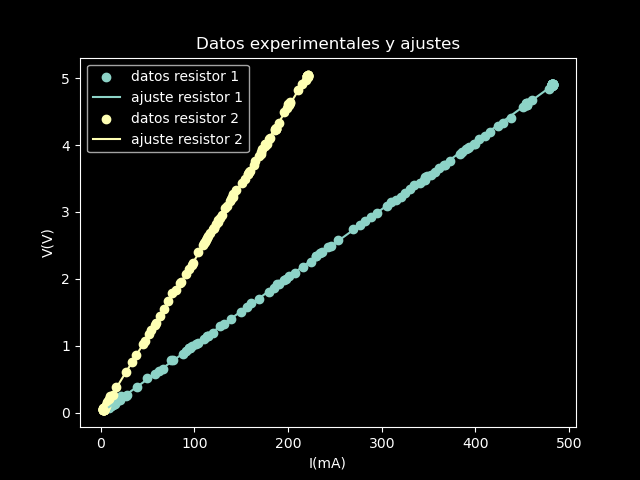

In [58]:
R1 = 10  # resistencia teórica resistor 1 Ω
R2 = 22 # resistencia teórica resistor 2 Ω
I_vs_R_1 = pd.read_csv('datos resistor 1.txt',delimiter='\t')
I_vs_R_2 = pd.read_csv('datos resistor 2.txt',delimiter='\t')
I_vs_R_bombillo = pd.read_csv('datos bombillo.txt')



R1exp=round(Alg.regresionlineal(I_vs_R_1['I(mA)'],I_vs_R_1 ['V(V)'])[0][0])
R2exp=round(Alg.regresionlineal(I_vs_R_2['I(mA)'],I_vs_R_2 ['V(V)'])[0][0])

error1=round(abs(R1-R1exp)/R1*100)
error2=round(abs(R2-R2exp)/R2*100)

fig, ax = plt.subplots()

lista = [[I_vs_R_1, 'resistor 1'], [I_vs_R_2, 'resistor 2'], [I_vs_R_bombillo,
                                                              'bombillo']]
for i in lista:
    datos=i[0]
    label=i[1]
    Alg.dibujo_reglineal(datos['I(mA)'].tolist(),datos['V(V)'].tolist(),0,0,'Datos experimentales y ajustes','I(mA)','V(V)',ax,label)
    

Basandonos en las gráficas de corriente contra voltaje, **podemos decir que si se cumple la ley de ohm** ya que las magnitudes fisicas anteriormente mencionadas son directamente proporcionales.Realizamos el ajuste para comparar el valor teórico y el experimental. 

In [39]:
print('El valor teórico para la resistencia 1 es:',R1,' Comparando con el valor experimental que es:',R1exp,' el error fue',error1)
print('-'*23)
print('El valor teórico para la resistencia 2 es:',R2,' Comparando con el valor experimental que es:',R2exp,' el error fue:',error2)
print('-'*23)
print('Vemos que los valores concuerdan de manera aceptable.')

El valor teórico para la resistencia 1 es: 10  Comparando con el valor experimental que es: 0  el error fue 100
-----------------------
El valor teórico para la resistencia 2 es: 22  Comparando con el valor experimental que es: 0  el error fue: 100
-----------------------
Vemos que los valores concuerdan de manera aceptable.


El rango de tolerancia para el resistor 1 y 2 son respectivamente 0,0. De acuerdo a los resultados anteriores podemos ver que la tolerancia está dentro del rango especificado por el fabricante.

## Ley de Ohm para un diodo

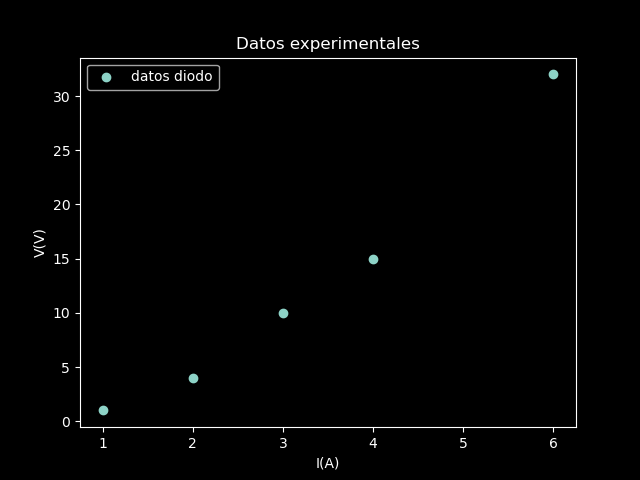

In [26]:
I_vs_R_diodo = pd.read_csv('datos diodo.txt')
fig,ax=plt.subplots()
ax.scatter(I_vs_R_diodo['I(A)'],I_vs_R_diodo['V(V)'],label='datos diodo')
ax.set_xlabel('I(A)')
ax.set_ylabel('V(V)')
ax.set_title('Datos experimentales')
ax.legend()


Evidentemente no se cumple la ley de ohm,ya que la corriente y el voltaje no son directamente proporcionales, en otras palabras la relación entre corriente y voltaje es mucho más compleja y tendríamos que hacer un ajuste no lineal en los datos. Concluimos que el **Diodo semiconductor no es óhmico**

## Resistores en serie y en paralelo

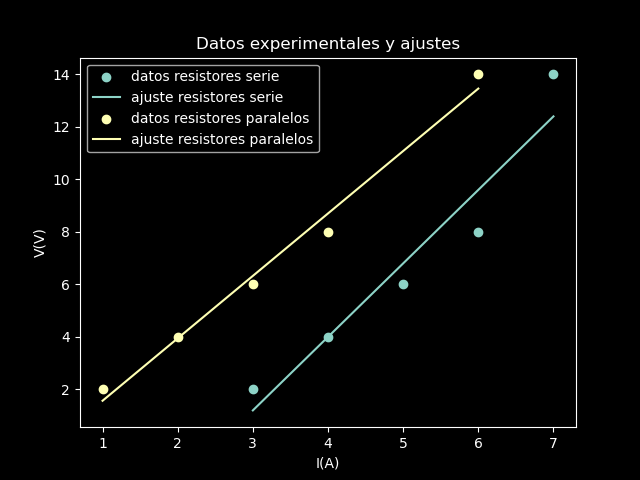

In [27]:
#Utilizamos los resitores del experimento 1
Rserie=R1+R2
inv_Rpar=(R1**-1)+(R2**-1)
Rpar=inv_Rpar**-1
I_vs_R_serie=pd.read_csv('datos resistores serie.txt')
I_vs_R_paralelo=pd.read_csv('datos resistores paralelos.txt')

Rserieexp=round(Alg.regresionlineal(I_vs_R_serie['I(A)'],I_vs_R_serie['V(V)'])[0][0])
Rparexp=round(Alg.regresionlineal(I_vs_R_paralelo['I(A)'],I_vs_R_paralelo['V(V)'])[0][0])
errorpar=round(abs(Rparexp-Rpar)/Rpar*100)
errorserie=round(abs(Rserieexp-Rserie)/Rserie*100)

fig, ax = plt.subplots()

Alg.dibujo_reglineal(I_vs_R_serie['I(A)'].tolist(),I_vs_R_serie['V(V)'].tolist(),0,0,'Datos experimentales y ajustes','I(A)','V(V)',ax,'resistores serie')
Alg.dibujo_reglineal(I_vs_R_paralelo['I(A)'].tolist(),I_vs_R_paralelo['V(V)'].tolist(),0,0,'Datos experimentales y ajustes','I(A)','V(V)',ax,'resistores paralelos')






In [28]:
print('El valor teórico para los resistores en serie:',Rserie,' Comparando con el valor experimental que es:',Rserieexp,' el error fue',errorserie)
print('-'*23)
print('El valor teórico para la resistencia 2 es:',Rpar,' Comparando con el valor experimental que es:',Rparexp,' el error fue:',errorpar)
print('-'*23)
print('Vemos que los valores concuerdan de manera aceptable.')

El valor teórico para los resistores en serie: 2  Comparando con el valor experimental que es: 3  el error fue 50
-----------------------
El valor teórico para la resistencia 2 es: 0.5  Comparando con el valor experimental que es: 2  el error fue: 300
-----------------------
Vemos que los valores concuerdan de manera aceptable.


# Análisis Cualitativo
- Toque con cuidado uno de los resistores con el dedo
apenas termine cada uno de los experimentos de ley
de Ohm y note su temperatura. ¿Está caliente? ¿Por
qué pasa esto? ¿Hay resistencias que se calientan más
que otras?

R// Esto pasa por que al pasar los electrones libres por los iones fijos y positivos del metal, estos mismos chocan aumentando su energía interna; esto se manifiesta como un aumento en la temperatura del conductor

Por otro lado si existen conductores que se calientan más que otros, ya que diferentes conductores presentan más o menos resistencia ocasionada por los iones positivos del metal, esto se manifiesta en la resistividad, que mide que tan fuerte debe ser el campo eléctrico para que fluyan los electrones con determinada densidad de corriente. Por último el hecho de que haya más resistencia implica que existirá más disipación de energía ocasionada por la resistencia de los iones positivos, esto se manifestará con algún grado de aumento en la temperatura. Por lo tanto si, hay resistencias que se calientan más que otras.

- ¿Qué pasaría si invirtiese el sentido de la corriente
en el primer montaje? Describa con palabras cómo
hubiese sido la gráfica de los datos.

R// Si esto pasará entonces ya no se descargaría la fuente de energía, si no por el contrario se cargaria. Adicionalmente la gráfica se vería reflejada en el origen por el cambio de dirección de corriente. El voltaje negativo significa que la corriente va en dirección de una zona de menor potencial a una de mayor potencial. En este caso tendríamos que cambiar la resistencia por un alternador que gastaría otro tipo de energía para mover las cargas almacenando así la energía en la fuente.

-  ¿Por qué en la configuración de resistores en paralelo
la corriente es diferente en cada una? ¿Por qué la
caída voltaje en cada uno es el mismo?

R//

- Si revisa el dorso del sensor de energía, encontrará un
esquemático del interior del sensor y de cómo están
ubicados el amperímetro y el voltímetro. ¿Por qué
están configurados de esa manera? ¿Qué pasaría si cambiasen de posición el voltímetro y el amperímetro? ¿Qué lectura arrojaría cada uno en ese caso?

R//




# Conclusión

Los objetivos de la práctica son claros desde el inicio, comprobar si efectivamente se cumple la ley de ohm para los conductores,verificar el comportamiento no óhmico de un diodo, verificar como se comportan las resistencias en paralelo y en seríe y verificar el rango de tolerancia de las resistencias.

Basado en el análisis hecho con anterioridad podemos decir que estos objetivos se cumplieron ya que:
- Comprobamos la ley de ohm para conductores y llegamos a resultados experimentales cercanos a los teóricos

        R1(experimental:   teórico:  ) tolerancia (experimental:   teórico:  ) 
        
        R2(experimental:   teórico:  ) tolerancia(experimental:   teórico:  )
        
        Rpar(experimental:   teórico:  ) 
        
        Rserie(experimental:   teórico:  )
        
- Comprobamos el comportamiento no óhmico de los diodos

    imagen(adjuntada)
   
Por último podimos evidenciar de primera mano el comportamiento básico de los circuitos(montaje,herramientas, convenciones sobre la lectura de resistencias de los resitores) y llevar a la práctica el conocimiento teórico de la física acerca de estos fenómenos.